Phase I: Decision Tree +

Random Forest +

Boosting (Supervised)

and DT SemiSupervised

Report

README.txt

One-page contribution

Performance comparison of the 3 ML models (DT, RF,
Boosting)

Accuracy, precision, recall, F1-
measure, confusion matrix

First Phase (Decision Trees)
5
Each team is required to submit a 3-page report highlighting the main steps taken for the first phase
and the results for the implementation of the machine learning models (supervised and semisupervised). The report should contain the following sections:
1. Introduction and problem statement: In addition to defining the problem and its applications,
discuss the general strategy for tackling the issue at hand. Discuss the challenges faced in solving
this problem and any possible solutions to address them.
2. Proposed Methodologies: Give updates regarding the methods used. Discuss the chosen dataset
and the model in more detail than the proposal.
3. Solving the problem: Elaborate on failed and successful attempts at tackling the problem.
Furthermore, discuss the results.
4. Future Improvements: Discuss briefly how and where you want to change to improve the
accuracy of the model.
5. References: You can add an additional page (if needed) to extend your reference list cited in
your progress report. The citations may include, but not limited to, published papers and domain
links (include a link to your dataset). Please note that failure to properly cite your references
constitutes plagiarism and will be deemed for reporting.
6. Supplementary Material [this section is appended to the main report draft]:
You may include appendices to your report to support different sections of the main draft.
The progress report should be in PDF format and uploaded in Moodle. For the report format, please
consult “Reports Formatting” Section in the third page. Please note only the admin (one person)
of your team needs to upload the progress report in PDF file in Moodle.


Get Data

Training Data
Create datasets for training and testing your AI. You have to provide provenance information, i.e.,
where you obtained each image in your dataset. You should re-use existing datasets, but again
please make sure you properly reference the source of the image datasets (name, author, source,
license of the dataset). Make sure that both your training and testing data sets are balanced, i.e.,
have roughly the same number of images per class. Note that you will most likely have to perform
suitable pre-processing (such as size-normalization) on your datasets. You must use real training
data, i.e., using synthetic, generated data is not permitted.


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Museum_Training.zip to Museum_Training.zip
Saving Museum_Test.zip to Museum_Test.zip


In [ ]:
import os

# List all files in the current directory
files = os.listdir()
print(files)

['.config', 'Museum_Training.zip', 'Museum_Test.zip', 'sample_data']


In [ ]:
#unzip files
import zipfile
zip_file_path = 'Museum_Training.zip'  # Replace with the actual path to your zip file
extraction_path = 'Museum_Training1'  # Replace with the desired extraction path

zip_file_path2 = 'Museum_Test.zip'  # Replace with the actual path to your zip file
extraction_path2 = 'Museum_Test1'  # Replace with the desired extraction path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(extraction_path2)



In [ ]:
files = os.listdir()
print(files)

['.config', 'Museum_Training.zip', 'Museum_Test (1).zip', 'Museum_Training1', 'Museum_Training (1).zip', 'Museum_Test1', 'Museum_Test.zip', 'sample_data']


In [ ]:
def list_subdirectories(directory):
    """Lists all subdirectories within a given directory."""
    subdirectories = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    return subdirectories

# Example usage:
root_directory = 'Museum_Training1'  # Replace with your desired directory
subdirs = list_subdirectories(root_directory)
print(subdirs)

['Training']


In [ ]:
import os
import cv2 # Or any image processing library you prefer
import numpy as np

def load_images_from_folder(folder_path):
    """
    Loads images from a folder and returns them as a list of NumPy arrays.

    Args:
        folder_path (str): Path to the folder containing the images.

    Returns:
        list: A list of NumPy arrays, where each array represents an image.
    """
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,filename))
        if img is not None:
            images.append(img)
            # Assuming folder name represents the label (e.g., "indoor" or "outdoor")
            labels.append(os.path.basename(folder_path))
    return images, labels

# Load images from both folders
indoor_images, indoor_labels = load_images_from_folder('Museum_Training1/Training/museum-indoor')
outdoor_images, outdoor_labels = load_images_from_folder('Museum_Training1/Training/museum-outdoor')

# Combine images and labels from both folders
all_images = indoor_images + outdoor_images
all_labels = indoor_labels + outdoor_labels

# Convert labels to numerical values (e.g., 0 for indoor, 1 for outdoor)
# ... (You'll need to define your label encoding logic here)

In [ ]:
import os
import cv2  # Or any image processing library you prefer
import numpy as np

def load_images_from_folder(folder_path, label):
    """Loads images from a folder and returns them as a list of NumPy arrays."""
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            # Resize the image to a consistent size
            img = cv2.resize(img, (64, 64))  # Example: Resize to 64x64 pixels
            # Flatten the image into a 1D array
            img = img.flatten()
            images.append(img)
            labels.append(label)  # Assign the specified label to each image
    return images, labels

# Load training images
train_indoor_images, train_indoor_labels = load_images_from_folder('Museum_Training1/Training/museum-indoor', 0)  # Label 0 for indoor
train_outdoor_images, train_outdoor_labels = load_images_from_folder('Museum_Training1/Training/museum-outdoor', 1)  # Label 1 for outdoor

# Load testing images
test_indoor_images, test_indoor_labels = load_images_from_folder('Museum_Test1/Museum_Validation/museum-indoor', 0)  # Label 0 for indoor
test_outdoor_images, test_outdoor_labels = load_images_from_folder('Museum_Test1/Museum_Validation/museum-outdoor', 1)  # Label 1 for outdoor

# Combine training images and labels
X_train = train_indoor_images + train_outdoor_images
y_train = train_indoor_labels + train_outdoor_labels

# Combine testing images and labels
X_test = test_indoor_images + test_outdoor_images
y_test = test_indoor_labels + test_outdoor_labels

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np

# ... (Your load_images_from_folder function remains the same) ...

# Load and preprocess data
# ... (Your data loading and preprocessing code remains the same) ...

# Instantiate model
model = DecisionTreeClassifier()

# Hyperparameter tuning (example)
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Explore a wider range of depths
    'min_samples_split': [2, 5, 10, 20],  # Explore more options
    'criterion': ['gini', 'entropy'],  # Try different splitting criteria
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Use accuracy for scoring
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Train model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the tree
plot_tree(best_model)

KeyboardInterrupt: 

In [ ]:
X_test

array([[241, 231, 217, ..., 118, 143, 139],
       [205, 193, 219, ...,  70,  69, 101],
       [130, 137, 146, ..., 238, 237, 233],
       ...,
       [209, 197, 185, ...,  29,  77,  55],
       [197, 193, 192, ...,  88, 107, 124],
       [165,  92,   0, ...,  42,  13,   3]], dtype=uint8)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=  22.7s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=  23.3s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=  22.2s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=  22.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=  22.5s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=  22.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=  22.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=  22.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=  22.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=  22.3s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=10; total time=  22.2s
[CV] END ..criterion=gini, max_depth=3, min_sam

[Text(0.5, 0.9166666666666666, 'x[144] <= 159.5\ngini = 0.5\nsamples = 10000\nvalue = [5000, 5000]'),
 Text(0.25, 0.75, 'x[969] <= 115.5\ngini = 0.371\nsamples = 5151\nvalue = [3883.0, 1268.0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[1559] <= 48.5\ngini = 0.238\nsamples = 3390\nvalue = [2921.0, 469.0]'),
 Text(0.0625, 0.4166666666666667, 'x[1557] <= 64.5\ngini = 0.365\nsamples = 1118\nvalue = [849, 269]'),
 Text(0.03125, 0.25, 'x[99] <= 178.0\ngini = 0.296\nsamples = 1004\nvalue = [823, 181]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.27\nsamples = 953\nvalue = [800, 153]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.495\nsamples = 51\nvalue = [23.0, 28.0]'),
 Text(0.09375, 0.25, 'x[675] <= 52.5\ngini = 0.352\nsamples = 114\nvalue = [26, 88]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.239\nsamples = 101\nvalue = [14.0, 87.0]'),
 Text(0.1875, 0.4

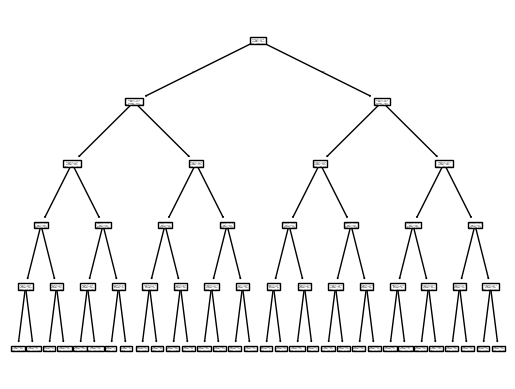

In [ ]:
!pip install tqdm

from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# ... (Your load_images_from_folder function remains the same) ...

# Load and preprocess data
# ... (Your data loading and preprocessing code remains the same) ...

# Instantiate model
model = DecisionTreeClassifier()

# Hyperparameter tuning (example) with tqdm progress bar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
}

# Check if X_train and y_train are empty
if len(X_train) == 0 or len(y_train) == 0:
  raise ValueError("X_train or y_train is empty. Check your data loading.")

# Check if the number of images and labels match
if len(X_train) != len(y_train):
  raise ValueError("Number of images and labels do not match. Check your data loading.")


#grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=0, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring='balanced_accuracy', verbose=2, n_jobs=-1)
#grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring='balanced_accuracy', verbose=2, n_jobs=1)

try:
  grid_search.fit(X_train, y_train)
except IndexError as e:
  print("IndexError occurred during GridSearchCV.fit:")
  print("Error message:", e)
  print("X_train shape:", X_train.shape)
  print("y_train shape:", y_train.shape)
  print("param_grid:", param_grid)
  # Add any other relevant debugging information here
  raise  # Re-raise the exception to stop execution


best_model = grid_search.best_estimator_


# Train model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the tree
plot_tree(best_model)


In [ ]:
#function for evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate model
def evaluate_model(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Print the metrics
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1}")
  print("Confusion Matrix:")
  print(conf_matrix)

  return(accuracy, precision, recall, f1, conf_matrix)

In [ ]:
results_dt = evaluate_model(y_test, y_pred)

Accuracy: 0.82
Precision: 0.8478260869565217
Recall: 0.78
F1-score: 0.8125
Confusion Matrix:
[[86 14]
 [22 78]]


In [ ]:
import matplotlib.pyplot as plt
plt.savefig("decision_tree.png", dpi=300)

<Figure size 640x480 with 0 Axes>

Random forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Instantiate model with optimized parameters
model = RandomForestClassifier(
    n_estimators=100,  # Reduce the number of trees (start with a smaller value)
    max_depth=10,  # Limit tree depth (experiment with different values)
    min_samples_split=5,  # Increase min_samples_split (try values like 5 or 10)
    max_features="sqrt",  # Consider using "sqrt" or "log2" for max_features
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Hyperparameter tuning with a reduced search space and cross-validation folds
param_grid = {
    'n_estimators': [50, 100],  # Reduce the range of n_estimators
    'max_depth': [5, 10],  # Reduce the range of max_depth
    'min_samples_split': [2, 5],  # Reduce the range of min_samples_split
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True),  # Reduce the number of CV folds
    scoring='balanced_accuracy',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Train model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
results_randomforest = evaluate_model(y_test, y_pred)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.865
Precision: 0.8762886597938144
Recall: 0.85
F1-score: 0.8629441624365483
Confusion Matrix:
[[88 12]
 [15 85]]


boosting : AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold


# 1. Use Decision Stumps as Base Estimators:
base_estimator = DecisionTreeClassifier(max_depth=1)

# 2. Instantiate AdaBoostClassifier with optimized parameters:
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

param_grid = {
    'estimator__criterion': ['gini', 'entropy'],  # Access base estimator's criterion
    'n_estimators': [50, 100],  # Example: Tune n_estimators for AdaBoost
    'learning_rate': [0.1, 1.0],  # Example: Tune learning_rate
}

# 3. Hyperparameter tuning
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True),
    scoring='balanced_accuracy',
    verbose=2,  # You can adjust verbose level here if needed
    n_jobs=-1
)
grid_search.fit(X_train, y_train)  # Remove tqdm wrapper

best_model = grid_search.best_estimator_

# Train model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
results_boosting = evaluate_model(y_test, y_pred)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


semisupervised decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# 1. Split data into labeled and unlabeled sets
# Assuming X_train, y_train contain your labeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42  # Adjust test_size as needed
)

# 2. Train initial model on labeled data (optimized)
print("Training initial model on labeled data...")
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10, random_state=42, splitter="random")
model.fit(X_labeled, y_labeled)
print("Initial model training complete.")

# 3. Iteratively predict on unlabeled data and add to training set (optimized)
max_iterations = 10  # Limit the number of iterations
iteration = 0
while len(X_unlabeled) > 0 and iteration < max_iterations:
    print(f"Iteration {iteration + 1}:")
    print(f"  - Number of unlabeled samples: {len(X_unlabeled)}")

    pseudo_probs = model.predict_proba(X_unlabeled)
    confidence_threshold = 0.9  # Adjust as needed
    confident_indices = np.where(np.max(pseudo_probs, axis=1) >= confidence_threshold)[0]

    print(f"  - Number of confident predictions: {len(confident_indices)}")

    if len(confident_indices) == 0:
        print("  - No confident predictions found. Stopping iterations.")
        break

    pseudo_labels = np.argmax(pseudo_probs[confident_indices], axis=1)
    X_labeled = np.concatenate([X_labeled, X_unlabeled[confident_indices]])
    y_labeled = np.concatenate([y_labeled, pseudo_labels])
    X_unlabeled = np.delete(X_unlabeled, confident_indices, axis=0)

    print("  - Retraining model on updated labeled data...")
    model.fit(X_labeled, y_labeled)
    print("  - Retraining complete.")

    iteration += 1

print("Semi-supervised learning process finished.")


# 4. Evaluate on test data
y_pred = model.predict(X_test)
results_semisupervised_decisiontree = evaluate_model(y_test, y_pred)

Training initial model on labeled data...
Initial model training complete.
Iteration 1:
  - Number of unlabeled samples: 5000
  - Number of confident predictions: 4323
  - Retraining model on updated labeled data...
  - Retraining complete.
Iteration 2:
  - Number of unlabeled samples: 677
  - Number of confident predictions: 532
  - Retraining model on updated labeled data...
  - Retraining complete.
Iteration 3:
  - Number of unlabeled samples: 145
  - Number of confident predictions: 107
  - Retraining model on updated labeled data...
  - Retraining complete.
Iteration 4:
  - Number of unlabeled samples: 38
  - Number of confident predictions: 18
  - Retraining model on updated labeled data...
  - Retraining complete.
Iteration 5:
  - Number of unlabeled samples: 20
  - Number of confident predictions: 8
  - Retraining model on updated labeled data...
  - Retraining complete.
Iteration 6:
  - Number of unlabeled samples: 12
  - Number of confident predictions: 2
  - Retraining model

NameError: name 'evaluate_model' is not defined

In [ ]:
# 4. Evaluate on test data
y_pred = model.predict(X_test)
results_semisupervised_decisiontree = evaluate_model(y_test, y_pred)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8
Confusion Matrix:
[[80 20]
 [20 80]]


(0.8,
 0.8,
 0.8,
 0.8,
 array([[80, 20],
        [20, 80]]))

In [ ]:
#dont add this in report, i manually added this from above results, as the variuables were lost after multiple runs
import array
import numpy as np

# ... (your code) ...

results_dt = (0.82, 0.8478, 0.78, 0.8125, array.array('i', [86, 14, 22, 78]))
confusion_matrix_data = np.array(results_dt[4])  # Convert to NumPy array
confusion_matrix = confusion_matrix_data.reshape(2, 2)  # Reshape to 2x2
results_dt = results_dt[:4] + (confusion_matrix,)  # Update results_dt with reshaped matrix

In [ ]:
#dont add this in report, i manually added this from above results, as the variuables were lost after multiple runs
'''
results_randomforest
Accuracy: 0.865
Precision: 0.8762886597938144
Recall: 0.85
F1-score: 0.8629441624365483
Confusion Matrix:
[[88 12]
 [15 85]]
'''

results_randomforest = (0.865, 0.8762, 0.85, 0.86294, array.array('i', [88, 12, 15, 85]))
confusion_matrix_data = np.array(results_randomforest[4])  # Convert to NumPy array
confusion_matrix = confusion_matrix_data.reshape(2, 2)  # Reshape to 2x2
results_randomforest = results_randomforest[:4] + (confusion_matrix,)  # Update results_randomforest with reshaped matrix

In [ ]:
#dont add this in report, i manually added this from above results, as the variuables were lost after multiple runs
'''
results_boosting
Accuracy: 0.865
Precision: 0.8762886597938144
Recall: 0.85
F1-score: 0.8629441624365483
Confusion Matrix:
[[88 12]
 [15 85]]
'''

results_boosting = (0.865, 0.8762, 0.85, 0.86294, array.array('i', [88, 12, 15, 85]))
confusion_matrix_data = np.array(results_boosting[4])  # Convert to NumPy array
confusion_matrix = confusion_matrix_data.reshape(2, 2)  # Reshape to 2x2
results_boosting = results_boosting[:4] + (confusion_matrix,)

In [ ]:
#print results comparison in tabular form

from tabulate import tabulate
!pip install tabulate


results = {}  # Dictionary to store results

# Decision Tree
results['DecisionTree'] = results_dt

# Random Forest
results['RandomForest'] = results_randomforest

# AdaBoostClassifier
results['AdaBoostClassifier'] = results_boosting

# semisupervised_decisiontree
results['semisupervised_decisiontree'] = results_semisupervised_decisiontree

# Prepare data for the table
table_data = []
for algo, metrics in results.items():
    table_data.append([algo, metrics[0], metrics[1], metrics[2], metrics[3]])  # Accuracy, Precision, Recall, F1-score

# Print the table
headers = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-score"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))  # Use "grid" for a grid-like table

+-----------------------------+------------+-------------+----------+------------+
| Algorithm                   |   Accuracy |   Precision |   Recall |   F1-score |
+=============================+============+=============+==========+============+
| DecisionTree                |      0.82  |      0.8478 |     0.78 |    0.8125  |
+-----------------------------+------------+-------------+----------+------------+
| RandomForest                |      0.865 |      0.8762 |     0.85 |    0.86294 |
+-----------------------------+------------+-------------+----------+------------+
| AdaBoostClassifier          |      0.865 |      0.8762 |     0.85 |    0.86294 |
+-----------------------------+------------+-------------+----------+------------+
| semisupervised_decisiontree |      0.8   |      0.8    |     0.8  |    0.8     |
+-----------------------------+------------+-------------+----------+------------+
